# Reducing dimensionality of images with PCA

In [110]:
def displayData(data):
    n = np.sqrt(data.shape[0])
    plt.figure(figsize=(10,10))
    data = data/255
    for index,photo in enumerate(data):
        plt.subplot(n,n,index+1)
        plt.imshow(photo.reshape(32,32).T)

In [73]:
def featureNormalize(X):
    mu = np.mean(X, axis=0).reshape(1,-1)
    X_norm = X-mu
    sigma = np.std(X, axis=0, ddof=1).reshape(1,-1)
    X_norm = X_norm/sigma
    return X_norm, mu, sigma

In [109]:
def PCA(X):
    m = X.shape[0]
    U, S, V = svd(X.T@X/m)
    return U, S

# Loading pictures dataset

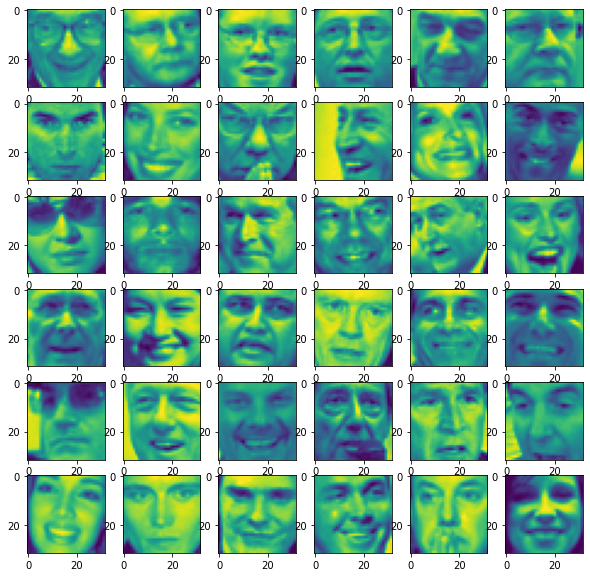

In [114]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

from scipy.linalg import svd

data = scipy.io.loadmat('ex7faces.mat')

X = data['X']

displayData(X[0:36,:])

# Plotting some of the eigenvectors after applying PCA

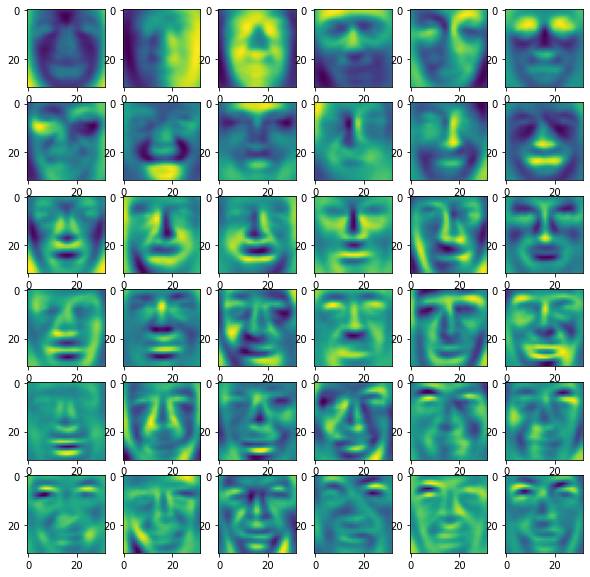

In [113]:
X_norm, mu, sigma = featureNormalize(X)

U, S = PCA(X_norm)

displayData(U[:,0:36].T)

# Plotting some original examples

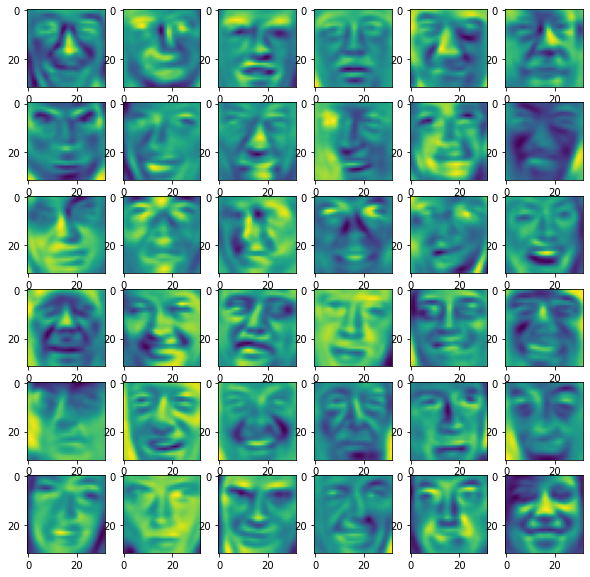

In [126]:
K = 100

U_reduced = U[:,0:K]

Z = X_norm@U_reduced
X_rec = Z@U_reduced.T

displayData(X_rec[0:36,:])

# Plotting some examples after apllying PCA

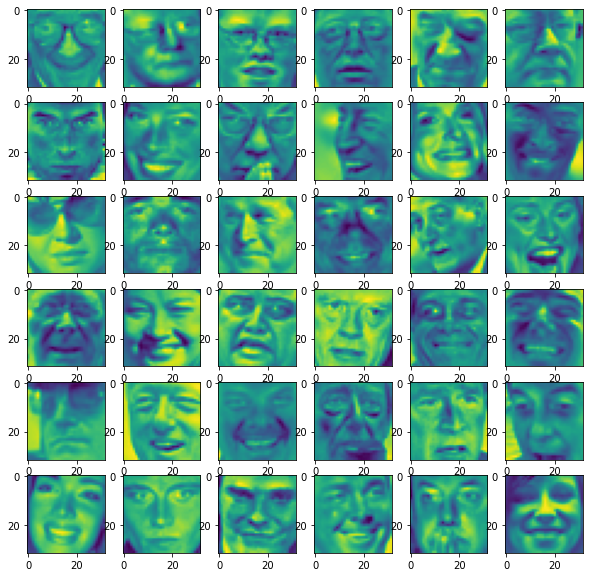

In [127]:
displayData(X_norm[0:36,:])